In [1]:
from ligo import em_bright
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd
import simulate_injections_rec_pairs

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
def gaussian_distribution(M_injection, sigma):
    M_recovered = np.random.normal(M_injection, sigma)
    M_recovered = np.array([M_recovered])
    return M_recovered
#this function would take in a random mass generated by var s, that will get put into the gaussian dist function
#with a predefined sigma 0.001
#a new variable mass_injections is run through a loop to iterate for every mass_inj (randomly produced), an array
#of the same length will iterate. so bascially for every mass produced, there is a recovered mass by the
#np.random.normal into M_recovered with the same sigma and that is 1 injection. we want 10,000 of these.

In [ ]:
# def one_mass_prediction(amt_inj, sig):
#     st1 = time.time()
#     M_inj1 = 10 + (20 - 10)*np.random.random(amt_inj)
#     #M_inj1 = 10 + (20 - 10)*np.random.random(100000)
#     #sigma = 0.001
#     sigma = sig
#     M_recovered_values = gaussian_distribution(M_inj1, sigma)
#     M_inj1 = M_inj1.reshape(-1, 1)
#     M_recovered_values = M_recovered_values.reshape(-1, 1)
#     X_train, X_test, y_train, y_test = train_test_split(M_inj1, M_recovered_values, test_size=0.20, random_state=42)
#     RandomForestRegressionModel = RandomForestRegressor()
#     RandomForestRegressionModel.fit(X_train, y_train)
#     y_pred = RandomForestRegressionModel.predict(X_test)
#     print(y_pred)
#     print(X_test)
#     et1 = time.time()
#     dt = et1 - st1
#     print(dt, 'time to train model')
#     df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
#     df2 = df1.corr()
#     plt.scatter(X_test, y_pred, s=2)
#     plt.xlabel('Test Masses')
#     plt.ylabel('Pred Masses')
#     plt.title("Predicting Injected Mass Values")
#     #plt.plot(X_test, y_pred, color='k')
#     plt.show()
#     mean_y_pred1 = np.mean(y_pred)
#     print(mean_y_pred1, 'average true mass prediction')
#     print(np.mean(M_inj1), 'avg mass injected')
#     error = (((np.mean(y_pred) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
#     print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
#     et2 = time.time()
#     dt1 = et2 - st1
#     print(dt1,'total time to run')
#     return X_test, y_pred, df2

In [ ]:
#one_mass_prediction(10000, 0.001)

In [ ]:
M_inj = mass_injections()

In [ ]:
M_inj

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd


class SimulateInjRecPairs:
    def __init__(self, N=100000, m_min=10, m_max=20):
        """
        METHOD:
        =======
        This method produces a random distribution of masses with a given range

        INPUT:
        ======
        N: Total number of samples
        m_min: Lower bound of the masses
        m_max: Upper bound of masses

        RETURNS:
        ========
        Distribution of injected masses reshaped as (-1, 1)   
        """
        M_inj = m_min + (m_max - m_min) * np.random.random(N)
        self.M_inj = M_inj.reshape(-1, 1)
        return self.M_inj

    def fake_recovered_masses(self, offset, sigma):
        """
        METHOD:
        =======
        This method creates a fake distribution of recovered masses based on the injected masses
        """
        #now we will get a gaussian distribution of the M_rec with an offset to t
        M_rec = np.random.normal(M_inj + offset, sigma)
        #now we have both the mass injections and mass recovered in however the len the N sample is
        self.M_rec = M_rec.reshape(-1, 1)
        #reshaping is better for the machine learning model
        return self.M_rec
    
    def mass_predictor(self, test_size=0.2, random_state=42, test_result=True):
        X_train, self.X_test, y_train, y_test = train_test_split(self.M_inj, self.M_rec, 
                                                                 test_size=test_size,
                                                                 random_state=random_state)
        RandomForestRegressionModel = RandomForestRegressor()
        RandomForestRegressionModel.fit(X_train, y_train)
        if not test_result:
            return RandomForestRegressionModel
        self.y_pred = RandomForestRegressionModel.predict(self.X_test)
        return (self.X_test, self.y_pred, RandomForestRegressor)
    
    def plotter(self):
        plt.scatter(self.X_test, self.y_pred, s=2) 
        plt.xlabel('Test Masses')
        plt.ylabel('Pred Masses')
        plt.title("Predicting Injected Mass Values")
        plt.show()

In [10]:
fake_recovered_masses(5, 1).SimulateInjRecPairs()

NameError: name 'fake_recovered_masses' is not defined

In [3]:
SimObj = simulate_injections_rec_pairs.SimulateInjRecPairs()

NameError: name 'simulate_injections_rec_pairs' is not defined

In [ ]:
SimObj.fake_recovered_masses(5, 1)

In [5]:
recs = SimObj.fake_recovered_masses(5, 1)

NameError: name 'M_inj' is not defined

In [3]:
preds = SimObj.mass_predictor()

AttributeError: 'SimulateInjRecPairs' object has no attribute 'M_rec'

In [4]:
SimObj.plotter()

AttributeError: 'SimulateInjRecPairs' object has no attribute 'X_test'

In [ ]:
print(SimObj.M_inj)
print(SimObj.M_rec)

In [ ]:
M_rec = mass_recovered_gauss_offset(5, 1)

In [ ]:
M_rec

In [ ]:
def mass_recovered_offset(offset):
    M_rec_1 = M_inj + offset
    M_rec_1 = M_rec_1.reshape(-1, 1)
    return M_rec_1

In [ ]:
M_rec_1 = mass_recovered_offset(5)
M_rec_1

In [ ]:
def mass_recovered(sigma):
    M_rec_2 = np.random.normal(M_inj, sigma)
    M_rec_2 = M_rec_2.reshape(-1, 1)
    return M_rec_2

In [ ]:
M_rec_2 = mass_recovered(1)
M_rec_2

In [ ]:
def mass_predictor(M_inj, M_rec, test_size=0.2, random_state=42, test_result=True):
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=test_size,
                                                        random_state=random_state)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    if not test_result:
        return RandomForestRegressionModel
    y_pred = RandomForestRegressionModel.predict(X_test)
    return (X_test, y_pred, RandomForestRegressor)

In [ ]:
x_test, y_pred, predictor = mass_predictor(M_inj, M_rec)

In [ ]:
x_test_1, y_pred_1, predictor = mass_predictor(M_inj, M_rec_1)

In [ ]:
x_test_2, y_pred_2, predictor = mass_predictor(M_inj, M_rec_2)

In [ ]:
x_test, y_pred, predictor

In [ ]:
x_test_1, y_pred_1, predictor

In [ ]:
x_test_2, y_pred_2, predictor

In [ ]:
plt.scatter(x_test, y_pred, s=2, label="With offset") #blue is np.normal(m_inj+offset, sigma) i think it is noise
#plt.plot([10, 20], [10, 20], "r--") #red is no offset, linear line
plt.plot(x_test_1, y_pred_1, 'g', label="No noise") #the green is just offset no sigma
plt.scatter(x_test_2, y_pred_2, s=2, label="No offset") #orange is no offset, with sigma
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
plt.legend()
plt.show()

In [ ]:
df1 = pd.DataFrame(data=np.column_stack((x_test, y_pred)),columns=['X_test','y_pred'])
df2 = df1.corr()
df1, df2

In [12]:
def one_mass_prediction_offset(N, offset, sigma, verbose=False, plot=False):
    #we also need to modularize the code, the code is overwhelmed and performing too many actions in one function
    #its similar to trying to multitask, using multiple functions and calling them within each other makes for cleaner
    #and more efficient code
    #st1 = time.time()
    M_inj = 10 + (20 - 10)*np.random.random(N)
    M_rec = np.random.normal(M_inj + offset, sigma)
    
    #we want to be able to make the function perform the np.random.normal(M_inj+offset, sigma), np.random.normal(M_inj, sigma), and just M_inj + offset
    #the problem is we need the detection to be able to take an input recovered mass that runs through these 
    #predictions to determine the true injected mass, eventually we want the offset to show a correlation
    #that correlation being if we have a two points with a big enough difference their offset should be showing to get worse
    #that gives us clarity that our model is getting better at predicting and acknowleding offsets are making
    #predictions worse and reducing accuracy
    
    M_inj = M_inj.reshape(-1, 1)
    M_rec = M_rec.reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=0.20, random_state=42)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    y_pred = RandomForestRegressionModel.predict(X_test)
    if verbose:
        print(y_pred, 'y_pred')
        print(X_test, 'X_test')
    #et1 = time.time()
    #dt = et1 - st1
    if verbose:
        print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
    df2 = df1.corr()
    plt.scatter(X_test, y_pred, s=2)
    plt.plot([10, 20], [10, 20], "r--")
    plt.xlabel('Test Masses')
    plt.ylabel('Pred Masses')
    plt.title("Predicting Injected Mass Values")
    #plt.plot(X_test, y_pred, color='k')
    plt.show()
    if verbose:
        mean_y_pred = np.mean(y_pred)
        print(mean_y_pred, 'average true mass prediction')
        print(np.mean(M_inj), 'avg mass injected')
        error = (((np.mean(y_pred) - np.mean(M_inj)) / np.mean(M_inj)) * 100) + 100
        print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
        et2 = time.time()
        dt1 = et2 - st1
        print(dt1,'total time to run')
    return df1, df2

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_81996/440693615.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


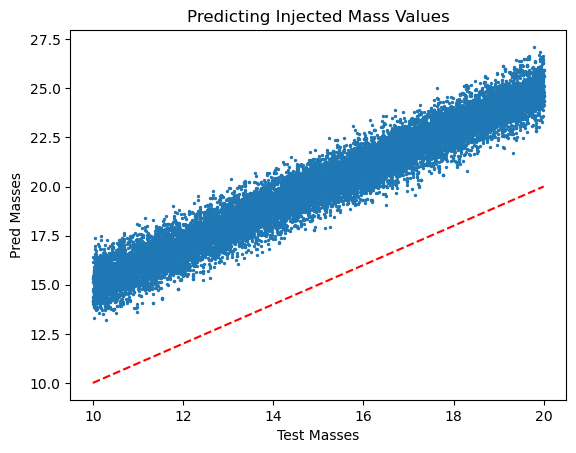

(          X_test     y_pred
 0      15.848150  20.923199
 1      18.464265  23.979337
 2      17.273860  22.285520
 3      13.015475  18.058322
 4      17.928695  24.056528
 ...          ...        ...
 19995  18.658022  23.287041
 19996  15.151901  19.976544
 19997  10.050939  14.212709
 19998  17.681421  22.295312
 19999  13.767700  19.558507
 
 [20000 rows x 2 columns],
           X_test    y_pred
 X_test  1.000000  0.972694
 y_pred  0.972694  1.000000)

In [14]:
one_mass_prediction_offset(100000, 5, 1)